In [1]:
import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from time import time

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [9]:
import cv2

In [31]:
import tensorflow as tf

In [33]:
# alexnet model implementation
def alexnet(input_shape, n_classes):
  input = Input(input_shape)
  
  # actually batch normalization didn't exist back then
  # they used LRN (Local Response Normalization) for regularization
  x = Conv2D(96, 11, strides=4, padding='same', activation='relu')(input)
  x = BatchNormalization()(x)
  x = MaxPool2D(3, strides=2)(x)
  
  x = Conv2D(256, 5, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPool2D(3, strides=2)(x)
  
  x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
  x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
  x = Conv2D(256, 3, strides=1, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPool2D(3, strides=2)(x)
  
  x = Flatten()(x)
  x = Dense(4096, activation='relu')(x)
  x = Dense(4096, activation='relu')(x)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model

In [6]:
file='C:/Users/lenovo/Documents/malaria'
categories=['Parasitized','Uninfected']

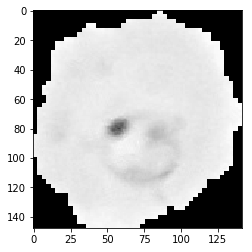

In [11]:
for category in categories:
  path=os.path.join(file,category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap='gray')
    plt.show()
    break
  break

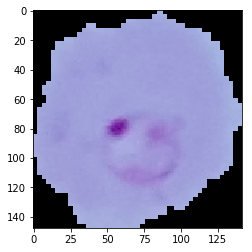

In [16]:
for category in categories:
    path=os.path.join(file,category)
    for img in os.listdir(path):
        img_array1=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array1,cmap='gray')
        plt.show()
        break
    break

In [19]:
training_data = []
for category in categories:  # do dogs and cats
  path = os.path.join(file,category)  # create path to dogs and cats
  class_num = category.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
  for img in (os.listdir(path)):  # iterate over each image per dogs and cats
    try:
      img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
      new_array = cv2.resize(img_array, (50,50))  # resize to normalize data size
      training_data.append([new_array, class_num])  # add this to our training_data
    except Exception as e:  # in the interest in keeping the output clean...
      pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))




In [21]:
import random
random.shuffle(training_data)

In [22]:
X1 = []
y1 = []

In [23]:
for features,label in training_data:
    X1.append(features)
    y1.append(label)
#print(X1[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X2 = np.array(X1).reshape(-1, 50,50, 1)

In [24]:
import pickle

pickle_out = open("X3.pickle","wb")
pickle.dump(X2, pickle_out)
pickle_out.close()

pickle_out = open("y2.pickle","wb")
pickle.dump(y1, pickle_out)
pickle_out.close()

In [25]:
pickle_in = open("X3.pickle","rb")
X4 = pickle.load(pickle_in)

pickle_in = open("y2.pickle","rb")
y3 = pickle.load(pickle_in)
X5 = X4/255.0

In [26]:
ip=np.array(X5)

In [27]:
target=np.array(y3)

In [32]:
model1=keras.models.Sequential([tf.keras.layers.Conv2D(96, 11, strides=4, padding='same', activation='relu',input_shape=(ip.shape[1:]))
tf.keras.layers.BatchNormalization()
tf.keras.layers.MaxPool2D(3, strides=2)
tf.keras.layers.Conv2D(256, 5, padding='same', activation='relu')
tf.keras.layers.BatchNormalization()
tf.keras.layers. MaxPool2D(3, strides=2)
tf.keras.layers.Conv2D(384, 3, strides=1, padding='same', activation='relu')
tf.keras.layers.Conv2D(384, 3, strides=1, padding='same', activation='relu')
tf.keras.layers.Conv2D(256, 3, strides=1, padding='same', activation='relu')
tf.keras.layers.BatchNormalization()
tf.keras.layers.MaxPool2D(3, strides=2)
tf.keras.layers.Flatten()
tf.keras.layers.Dense(4096, activation='relu')
tf.keras.layers.Dense(4096, activation='relu')
tf.keras.layers.Dense(2, activation='softmax')])
  

SyntaxError: invalid syntax (<ipython-input-32-3e19c5b23c05>, line 2)

In [ ]:
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model1.fit(ip,y3,epochs=10)

In [ ]:
ss=model1.predict(ip)

In [ ]:
img_array = cv2.imread('download ball.jpg' ,cv2.IMREAD_GRAYSCALE)  
new_array = cv2.resize(img_array, (50,50))

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    g=np.array(gray).reshape(1,50,50,1)
    predictions=model1.predict(g)
    #find max indexed array
    max_index = np.argmax(predictions[0])
    number_to_class=['Parasitized','Uninfected']
    #sorti=np.argmax(prob)
    print('most likely class:',number_to_class[max_index])
    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()